 ## Applying Statistical ML models to predict Heart Disease in Patients

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE #recursive feature elimination (RFE) a wrapper method

from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import  confusion_matrix, auc


## Importing DataFrame

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.duplicated().sum()

723

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visiualization and Pre-Processing

## Navya's Part

/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_38505/966960762.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(['Female','Male'])


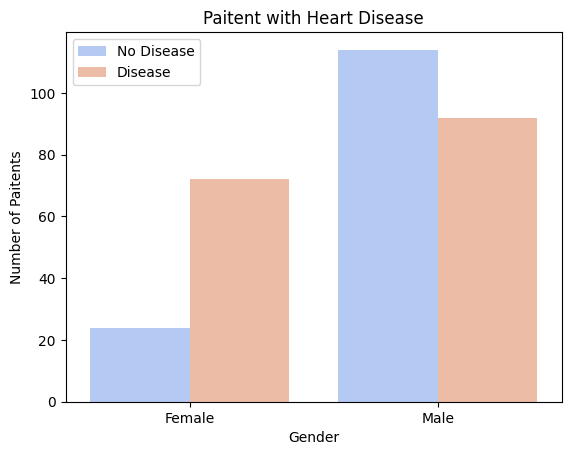

In [8]:
## Checking patient genders with heart disease distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig = sns.countplot(x = 'sex' , data = df, palette='coolwarm', hue='target')

fig.set_xticklabels(['Female','Male'])

plt.title('Paitent with Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of Paitents')
plt.legend(['No Disease', 'Disease'])
plt.show()


## Target Variable Class Distribution

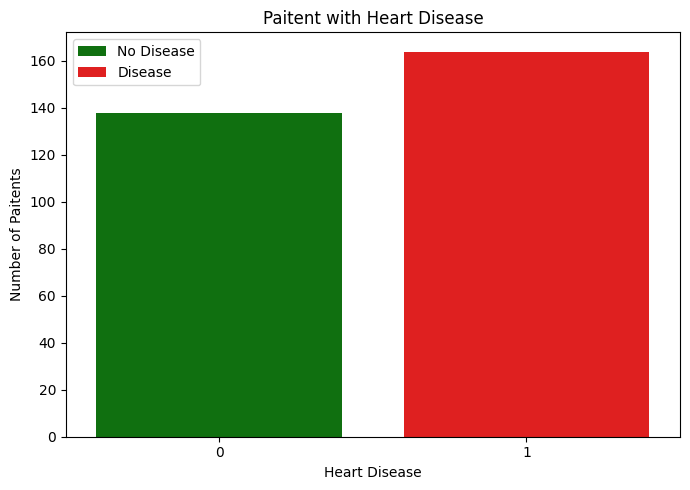

In [9]:
## Checking patient with heart disease
plt.figure(figsize=(7,5))
fig = sns.countplot(x = 'target' , data = df, palette = ['green','red'], hue = 'target')
#fig.set_xticklabels(['Positive','Negative'])
plt.title('Paitent with Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Paitents')
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()


## Checking the distribution of Numerical features

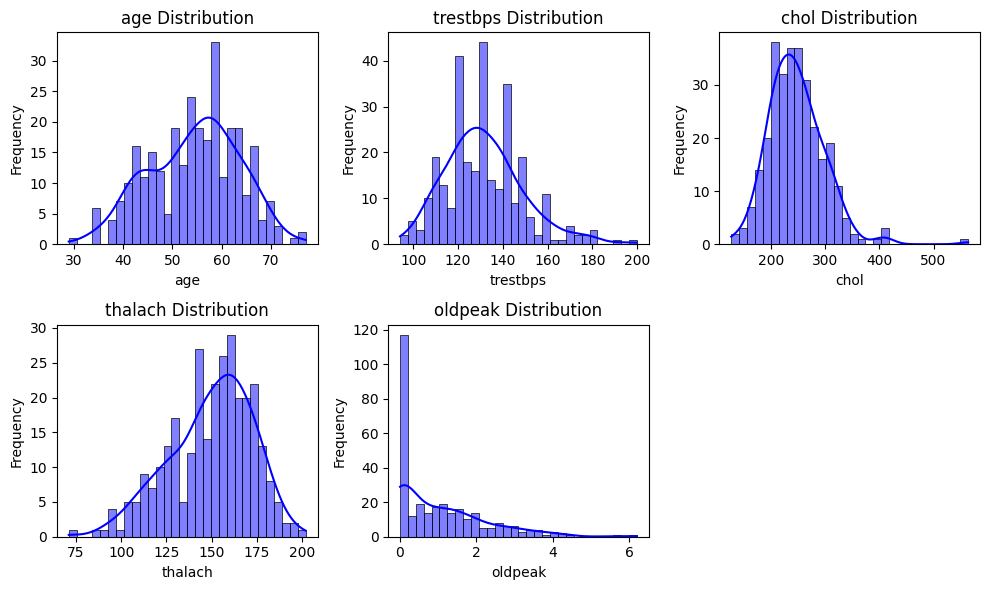

In [10]:
## Checking the distribution of numerical features
plt.figure(figsize=(10, 6))

num_features = ['age', 'trestbps', 'chol','thalach', 'oldpeak']
# Plot data on each subplot
for i, column in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], color='blue', kde=True, bins=30)

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Dicretizing the age column

In [11]:
# creating bins for age
df['age'] = pd.cut(df['age'], bins = [1, 29, 40, 50, 60, 70, 100], labels = ['0', '1', '2', '3', '4', '5'])
df.age.head()

0    3
1    3
2    4
3    4
4    4
Name: age, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

In [12]:
# converting age to numerical
df['age'] = df['age'].cat.codes

# Checking the distribution of Catagorical features


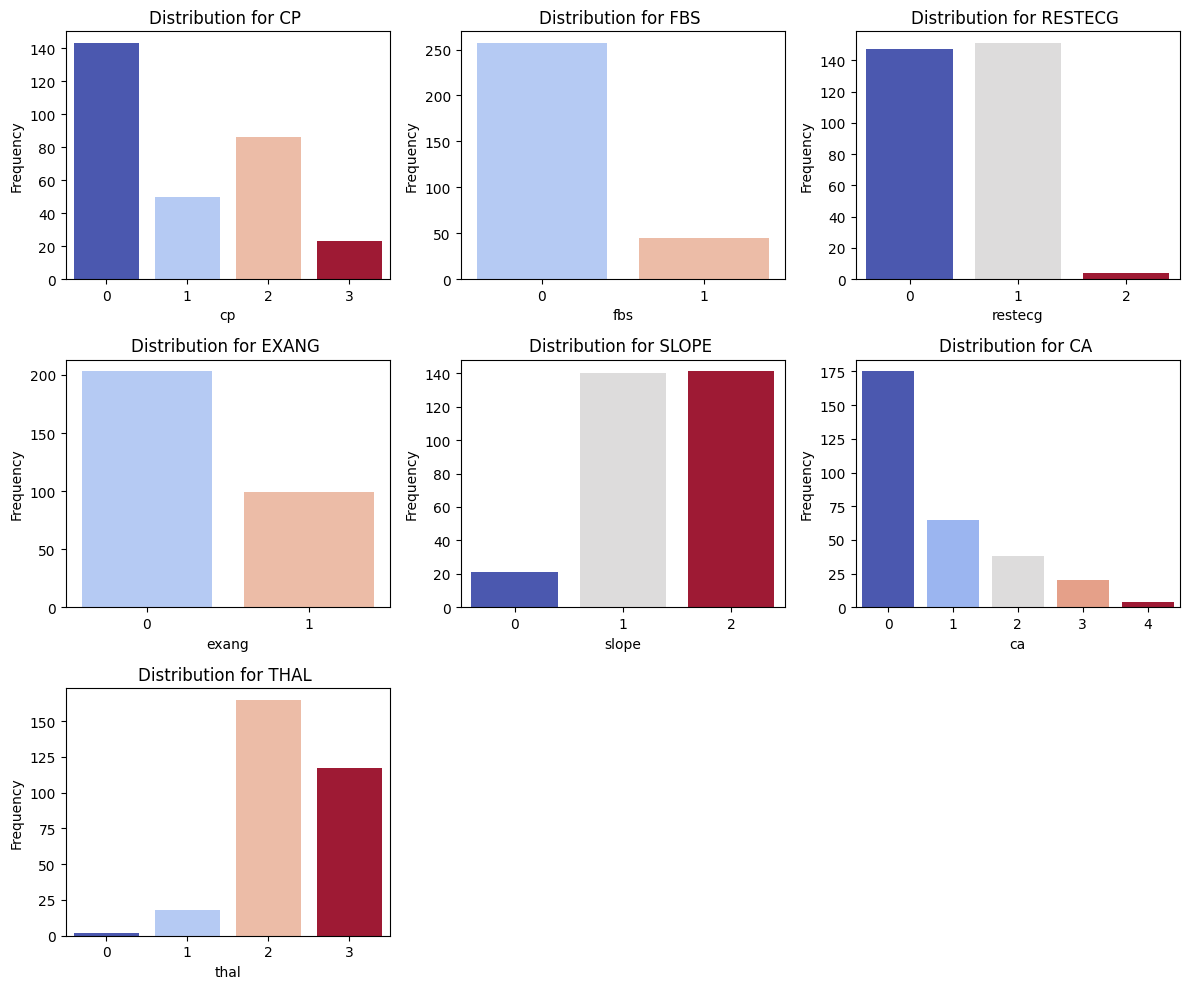

In [13]:
plt.figure(figsize=(12, 10))
catag = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']
# Plot data on each subplot
for i, column in enumerate(catag):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[column], data = df, palette = 'coolwarm', hue = df[column])
    plt.title(f'Distribution for {column.upper()} ')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.legend().remove()

plt.tight_layout()
plt.show()

# Heatmap plot to check Coorealtion between features  
* There is no correlaton among Features  

* So far we will stick with all the Features

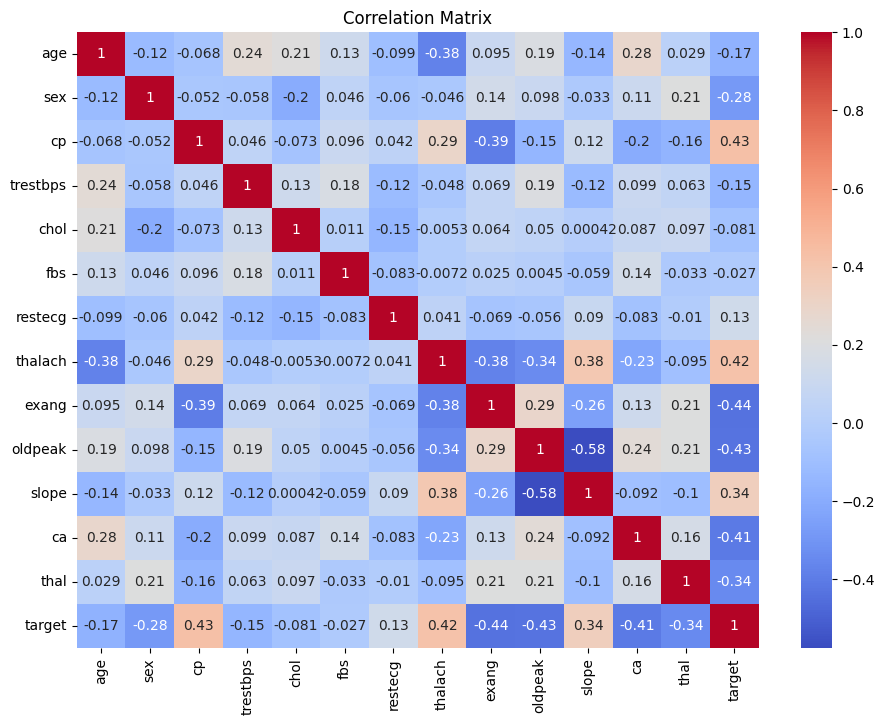

In [14]:
# Checking the coorelation between the features
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

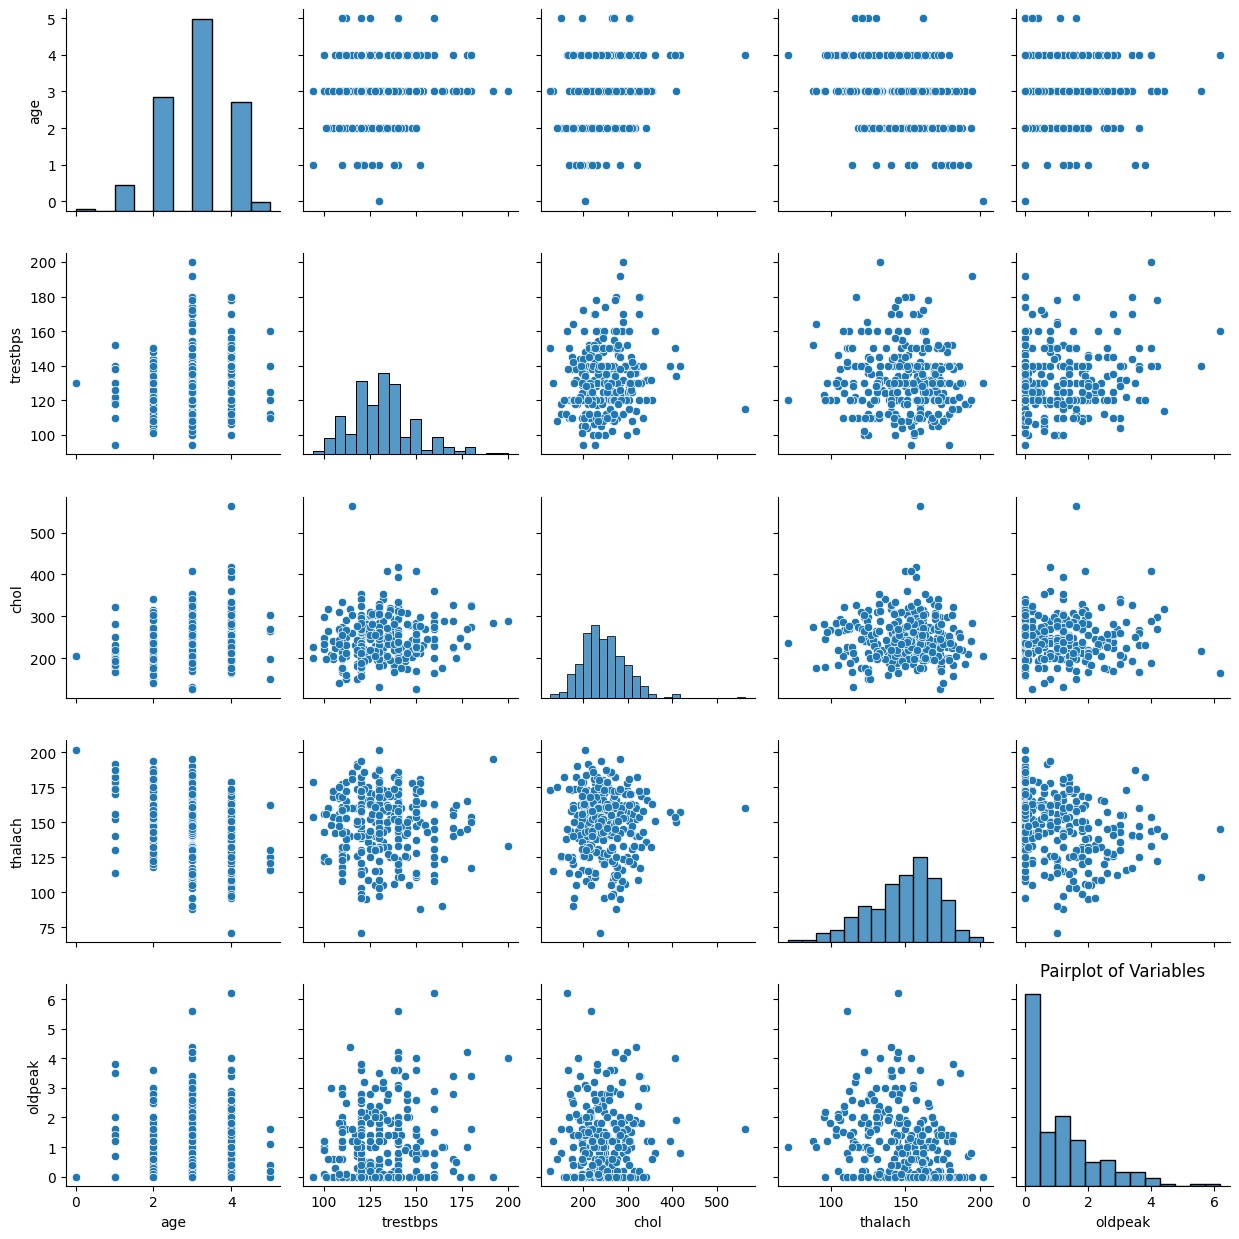

In [15]:
# Plotting the pairplot of the variables
sns.pairplot(df[num_features])
plt.title('Pairplot of Variables')
plt.tight_layout()
plt.show()

## Outliers 

* There is not much skewness in the Fetaures  

* Few outliers can be seen in the boxplots  

* There are not much outliers

* These outliers can be removed with data scaling

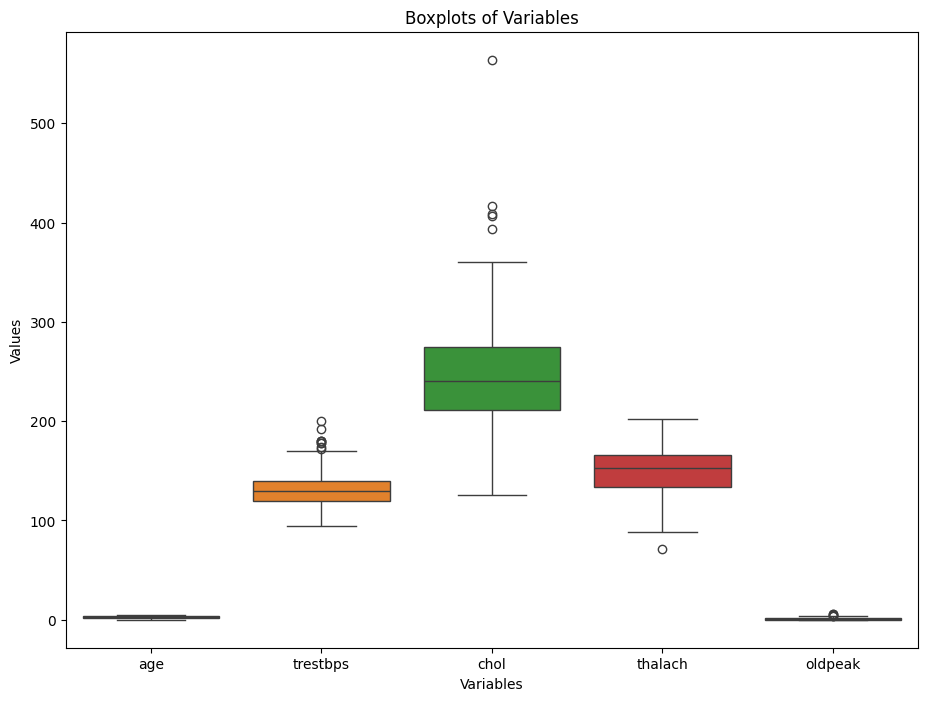

In [16]:
# plotting the boxplot of the variables
plt.figure(figsize=(11, 8))
sns.boxplot(data=df[['age','trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.show()


# Usama's Part

## Feature Selection and Scaling

## Trying to determine the best features  

refrence: https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance

In [17]:
# Creating Dummy variables for the categorical features
df = pd.get_dummies(df, columns = catag, drop_first = True)
df.astype('int64')


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,3,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,3,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,4,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,4,0,120,211,115,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,2,0,108,141,175,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,3,1,128,255,161,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,3,1,160,273,125,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Applying the standard scaler to the dataset
new_df = df.copy()
scaler = StandardScaler()
new_df[num_features] = scaler.fit_transform(new_df[num_features])

In [19]:
# Creating Predictor and Target Variables
X = new_df.drop('target', axis=1)
y = new_df['target']


## Data Splitting

In [20]:
# using Logistic Regression, SVM, Random Forest Classifiers to predict the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Selection  

### Based on the dataset nature with labeled data and less than 100k samples
### We will test following models and selected the final model


* Model 2: Support Vector Classifier  

Ensemble Models  

* Model 3: Random Forest Classifier  

* Model 4 : AdaBoost Classifier

In [21]:
# creating list of models
models = [('SVM',SVC(kernel='linear')), 
          ('Random Forest',RandomForestClassifier(n_estimators=10)), ('AdaBoost', AdaBoostClassifier(algorithm='SAMME'))]


# Evaluating Models Before Model Selection

In [37]:
# creating a function to fit the models for Training Dataset
# Predicting on the training dataset and calculating the accuracy score
def fit_and_score_train(models, X_train, y_train):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        print(f'Predicting on the training datase \n \t\t**{name}** \n Accuracy Score for {name} is: {accuracy_score(y_train, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_train, y_pred)}\n')
        #model_scores[name] = model.score(X_train, y_train)
    return (model_scores)

model_scores= fit_and_score_train(models, X_train, y_train)
#model_scores

Predicting on the training datase 
 		**SVM** 
 Accuracy Score for SVM is: 0.8879668049792531
Precision Score SVM is: 0.8661971830985915

Predicting on the training datase 
 		**Random Forest** 
 Accuracy Score for Random Forest is: 0.995850622406639
Precision Score Random Forest is: 0.9924242424242424

Predicting on the training datase 
 		**AdaBoost** 
 Accuracy Score for AdaBoost is: 0.8962655601659751
Precision Score AdaBoost is: 0.8955223880597015



In [38]:
# creating a function to fit the models for Test Dataset
def fit_and_score_test(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'Predicting on the test datase \n \t\t**{name}** \n Accuracy Score for {name} is: {accuracy_score(y_test, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_test, y_pred)}\n')
        #model_scores[name] = model.score(X_test, y_test)

    return (model_scores)

model_scores = fit_and_score_test(models, X_train, X_test, y_train, y_test)
#model_scores

Predicting on the test datase 
 		**SVM** 
 Accuracy Score for SVM is: 0.8524590163934426
Precision Score SVM is: 0.875

Predicting on the test datase 
 		**Random Forest** 
 Accuracy Score for Random Forest is: 0.8032786885245902
Precision Score Random Forest is: 0.8620689655172413

Predicting on the test datase 
 		**AdaBoost** 
 Accuracy Score for AdaBoost is: 0.8360655737704918
Precision Score AdaBoost is: 0.896551724137931



# Featuer Selection using RFE

In [24]:
estimator = RandomForestClassifier(random_state=42)
selector  = RFE(estimator)
selector = selector.fit(X_train, y_train)

selected_columns_indices = selector.get_support(indices=True)
selected_columns = X_train.columns[selected_columns_indices]
selected_columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_2',
       'exang_1', 'ca_1', 'thal_2', 'thal_3'],
      dtype='object')

In [25]:
X_train_new = X_train[selected_columns]
X_test_new = X_test[selected_columns]

## Trainning and Testing of Models on Trainning Dataset

In [26]:
# creating a function to fit the models for Training Dataset
# Predicting on the training dataset and calculating the accuracy score
def fit_and_score_train(models, X_train, y_train):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_train_new)
        print(f'\t\t**{name}** \nAccuracy Score for {name} is: {accuracy_score(y_train, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_train, y_pred)}\n')
        #model_scores[name] = model.score(X_train, y_train)
    return (model_scores)

model_scores= fit_and_score_train(models, X_train, y_train)
#model_scores

		**SVM** 
Accuracy Score for SVM is: 0.8257261410788381
Precision Score SVM is: 0.8449612403100775

		**Random Forest** 
Accuracy Score for Random Forest is: 0.991701244813278
Precision Score Random Forest is: 0.9923664122137404

		**AdaBoost** 
Accuracy Score for AdaBoost is: 0.8713692946058091
Precision Score AdaBoost is: 0.8731343283582089



### Trainning and Testing of Models and Predicting on Test Dataset

In [27]:
# creating a function to fit the models for Test Dataset
def fit_and_score_test(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        print(f'\t\t**{name}** \n Accuracy Score for {name} is: {accuracy_score(y_test, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_test, y_pred)}\n')
        #model_scores[name] = model.score(X_test_new, y_test)

    return (model_scores)

model_scores = fit_and_score_test(models, X_train, X_test, y_train, y_test)
#model_scores

		**SVM** 
 Accuracy Score for SVM is: 0.819672131147541
Precision Score SVM is: 0.84375



		**Random Forest** 
 Accuracy Score for Random Forest is: 0.819672131147541
Precision Score Random Forest is: 0.8928571428571429

		**AdaBoost** 
 Accuracy Score for AdaBoost is: 0.7868852459016393
Precision Score AdaBoost is: 0.8333333333333334



## Applying K-Fold Cross Validation

In [36]:
# Selecting best model using Cross validation by iterating through the models 

for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} has a cross-validated score of {(cv_scores)}')
    print(f'{name} has a cross-validated mean score of {np.mean(cv_scores)}\n')

SVM has a cross-validated score of [0.86885246 0.85245902 0.88333333 0.78333333 0.78333333]
SVM has a cross-validated mean score of 0.8342622950819673

Random Forest has a cross-validated score of [0.7704918  0.73770492 0.78333333 0.78333333 0.75      ]
Random Forest has a cross-validated mean score of 0.7649726775956284

AdaBoost has a cross-validated score of [0.85245902 0.78688525 0.88333333 0.76666667 0.78333333]
AdaBoost has a cross-validated mean score of 0.8145355191256831



## Applying GridSearch to tune Hyperparameters

# From scikit learn list of Parameters for SVM

### selecting:  

* C 
* kernel
* gamma
* degree

In [29]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(SVC().get_params())


Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [30]:
# Creating a hyperparameter grid for Random Forest Classifier
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type: linear or radial basis function (RBF)
    'gamma': ['scale', 'auto'],      # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]              # Degree of the polynomial kernel function
}

## Performing Random Search with K-fold for Hyperparameter Tunning

In [31]:
# Defining KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating a hyperparameter grid for Random Forest Classifier
grid_search = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=kf)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_


## Using Best Hyperparameters for Model Prediction

In [32]:
print(f'The best parameters are {best_param}')

The best parameters are {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'C': 1}


## Prdicting with the best Model with Hyperparameter fro 'Support Vector Machine'


Model Performance

Accuracy with SVC on Test dataset:  0.8524590163934426


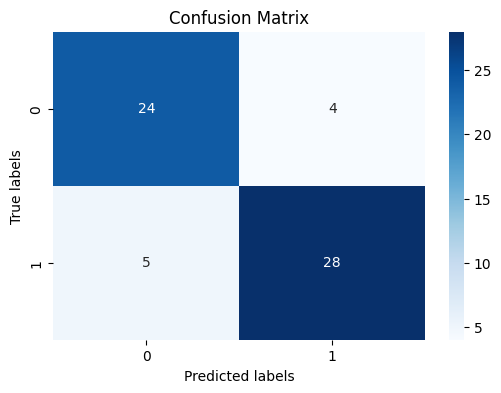


Classification Report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Sensitivity: 0.8571428571428571

Specificity: 0.8484848484848485


In [39]:
# svc classifier with best parameters
svc_clf = SVC(**best_param)
# Fit the model to the training data
svc_clf.fit(X_train, y_train)

# Predicting on the training dataset
#y_pred_train = svc_clf.predict(X_train)

# Predicting on the test dataset
y_pred_test = svc_clf.predict(X_test)

# Calculating the accuracy score for the training dataset
#accuracy_train = accuracy_score(y_train, y_pred_train)
#print('Accuracy with SVC on Train dataset: ' ,(accuracy_train))

# Calculating the accuracy score for the test dataset
accuracy = accuracy_score(y_test, y_pred_test)
print('\nModel Performance')
print('\nAccuracy with SVC on Test dataset: ' ,(accuracy))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
#print('\nConfusion Matrix\n', conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Creating a classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report\n', class_report)

# Sensitivity
sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('\nSensitivity:', sensitivity )

#Specificity
specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('\nSpecificity:', specificity)

In [34]:
# ROC Score
AuC = roc_auc_score(y_test, y_pred_test)
print('\nROC Score:', AuC)


ROC Score: 0.8528138528138529



FPR :  [0.         0.14285714 1.        ]

TPR :  [0.         0.84848485 1.        ]

Thresholds :  [inf  1.  0.]


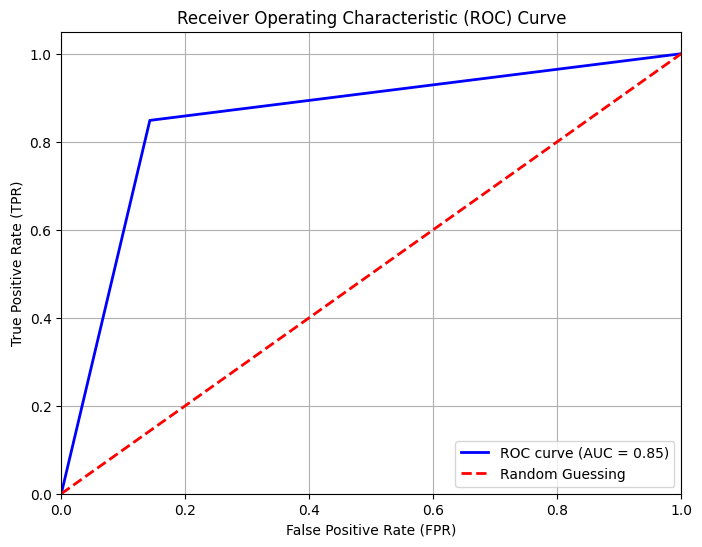

In [35]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test) # fpr = false positive rate, tpr = true positive rate
print('\nFPR : ', fpr)
print('\nTPR : ', tpr)
print('\nThresholds : ', thresholds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AuC)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
